### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.model_selection for hyperparameter tuning and SSE calculation

All model selection methods were utilized at some point, but **train_test_split** proved to be the best tool for this situation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LassoCV, Lasso, LinearRegression, ElasticNet, LassoLars
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, train_test_split, KFold

### **Data Extraction**:

Input files are loaded into variables *x*, *y* and *x_project*, this last one being from the *x_test* file. Commented below is a subset of code that performs outlier removal of two points who in a previous analysis were thought to be harmful for our model. But later these points did appear to have a degree of importance, especially due to them being similar to a couple of points in the testing samples. What is not commented, is the removal of four features from x_train and x_test, these same features from analysis through lasso revealed to be a little bit harmful to the SSE of our model. Thus, removing said dimensions improves our accuracy while still keeping our model structured and secure.

In [2]:
# Load data
x = np.load("model2_x.npy")
y = np.load("model2_y.npy")
# x_project = np.load("X_test_regression1.npy")

# Outlier removal (not used in final implementation, but tested)
# x = np.delete(x, 9, 0)
# y = np.delete(y, 9, 0)
# x = np.delete(x, 7, 0)
# y = np.delete(y, 7, 0)

# Feature Removal
# x = np.delete(x, 0, 1)
# x = np.delete(x, 3, 1)
# x = np.delete(x, 5, 1)
# x = np.delete(x, 5, 1)

# x_project = np.delete(x_project, 0, 1)
# x_project = np.delete(x_project, 3, 1)
# x_project = np.delete(x_project, 5, 1)
# x_project = np.delete(x_project, 5, 1)

### **Grid Search Method**:

In our earlier implementations we utilized the **GridSearchCV** function as shown below for the automatic calculation of an optimal hyperparameter of our model. However, for our specific dataset, a more "hands-on" method for hyperparameter determination was adopted, as we will show in latter parts of the code. Nonetheless this method still provided near-optimal results.

In [3]:
alphas_ridge = np.arange(0.01, 5, 0.1)  # (initial value, final value, number of values)

# param_grid corresponds to the multitude of parameters we want to test
param_grid = {'alpha': alphas_ridge}

grid_ridge = Ridge()
grid_search = GridSearchCV(grid_ridge, param_grid, scoring='r2', cv=5)
grid_search.fit(x, y)

# Gives us the best alpha value
# print(grid_search.best_params_)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91])},
             scoring='r2')

### **Cross-Validation and SSE Calculation**:

As stated earlier, we utilize cross-validation to provide us a metric from which to compare models and hyper-parameter tuning, which the function **train_test_split** provides by separating our original training data (*x* and *y*) into two subsets of *X_train*/*y_train* and *X_test*/*y_test*. This ratio was introduced by us to be one test sample per fourteen training samples (Leave One Out CV), as due to our very small sample size, pertains to the best possible characterization of our model. It also helps us that we can reproduce it's entire possible combinations (15), which are all employed, the *y_test* is predicted, and it's SSE is directly calculated. At the end of all these possible arrangement combinations the SSE mean is calculated and displayed.

In [4]:
# Seed values for random_state, for all possible combinations of features
num_iterations = [30, 37, 39, 1, 29, 5, 8, 13, 7, 19, 17, 2, 3, 9, 15]

# Seed values for random_state, for all possible combinations of features (with outliers removed)
# remove_points = [30, 31, 1, 4, 2, 5, 3, 8, 7, 36, 12, 18, 24]

scores = []

# Hyper-parameters for CV integrated models (like LassoCV) (not used in final implementation, but tested)
# cv_alpha = [0.08713, 0.08713]

# Model type was switched out for all models imported, and alpha values tweaked
ridge_model = Ridge(alpha=0.301)

# For all 15 combinations
for i in num_iterations:
    
    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1, train_size=14, random_state=i)
    
    # Fit our Model
    ridge_model.fit(X_train, y_train.ravel())

    # Calculate the SSE
    sse = (np.linalg.norm(y_test - ridge_model.predict(X_test))) ** 2
    
    # Display SSE for each iteration
    # print(f'SSE: {sse} (iteration {i})')
    
    # Display coefficients, which was used (through Lasso) to determine which features to remove
    # print(f'{ridge_model.coef_} \n \n')
    
    # Save SSE value in final list
    scores.append(sse)

# Display mean SSE
print(f'SSE Mean: {np.mean(scores)}')

SSE Mean: 0.19758489847752086


### **Project Submission Procedures**:

This module creates our optimal model, fits it into our entire data (save for the features removed), predicts *y_test*, reshapes it into the desired output structure, and saves it into a *.npy* file.

In [5]:
# Optimal Model Chosen
ridge_model = Ridge(alpha=0.301)
ridge_model.fit(x,y)

# y_test_regression1 prediction and reshape
# y_project = ridge_model.predict(x_project).reshape(-1,1)

#  y_train and predicted y_train analysis
# print(f'True Results: {y} \n Predicted Results: {ridge_model.predict(x)}')

# y_test shape confirmation
# print(f'Shape: {y_project.shape}')

# File Saved
# np.save("y_test_regression1.npy", y_project)

# File confirmation and testing
# y_trial = np.load("y_test_regression1.npy")
# print(y_trial)

Ridge(alpha=0.301)

### **Plot Generation**:

For each model's detailed analysis, it was import to view the model's behavior in SSE for any hyper-parameter fluctuation, so a procedure quite similar to the one previously presented was made, the main diference here being the continous determination of SSE means for the specified hyper-parameter interval. With this, the plot below is created. It was through this model that Lasso's "instability" was denoted, and Ridge's "secureness" was found. This was emplyoed for all models imported, and to do just that is simply a manner of replacing the "Ridge" in the model creation for any one we would like.

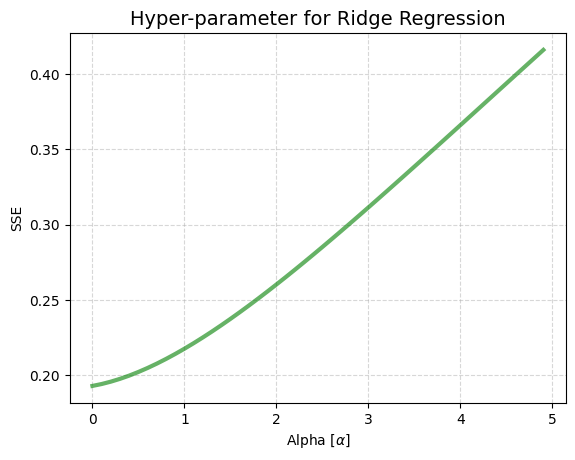

Best SSE: 0.19286925752082024
Best Alpha: 0.001


In [6]:
# Hyper-parameter interval determination
alphas_plot = np.arange(0.001, 5, 0.1)  # (initial value, final value, number of values)

# Seed values for random_state, for all possible combinations of features
num_iterations = [30, 37, 39, 1, 29, 5, 8, 13, 7, 19, 17, 2, 3, 9, 15]

# Seed values for random_state, for all possible combinations of features (with outliers removed)
# remove_points = [30, 31, 1, 4, 2, 5, 3, 8, 7, 36, 12, 18, 24]

# SSE list for each combination, organized through alpha
scores = [[] for _ in range(len(num_iterations))] 

# The list of each SSE mean, organized through alpha
list_sse = []

# The list of each alpha
index_alpha = []

# For all 15 combinations
for i in range(len(num_iterations)):

    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1, train_size=14, random_state=num_iterations[i])
    
    # For all the alphas
    for j in alphas_plot:
        
        # Create and Fit our Model
        ridge_model = Ridge(alpha=j, max_iter=100000)
        ridge_model.fit(X_train, y_train)
        
        # Calculate the SSE
        sse = (np.linalg.norm(y_test - ridge_model.predict(X_test))) ** 2
        
        # Display SSE for each iteration
        # print(f'SSE for alpha {j}: {sse} (iteration {i})')
        
        # Save SSE value in list
        scores[i].append(sse)

index_alpha = alphas_plot
for i, alpha in enumerate(alphas_plot):
    # SSE Mean Calculation
    list_sse.append(np.mean([scores[j][i] for j in range(len(num_iterations))]))

# Plot Parameters
plt.plot(index_alpha, list_sse, color="green", linewidth=3, alpha=0.6)
plt.xlabel(r"Alpha [$\alpha$]")
plt.ylabel(r"SSE")
plt.title(r"Hyper-parameter for Ridge Regression", fontsize=14)
plt.grid(linestyle = '--', alpha=0.5)
plt.show()

# Minimum SSE Value
min_value = min(list_sse)
print(f'Best SSE: {min_value}')

# Best Hyper-parameter
print(f'Best Alpha: {index_alpha[list_sse.index(min_value)]}')

# Lists saved into .txt files for the final MatLab plots (as seen in the final report!)
# np.savetxt('x.txt', index_alpha, fmt='%f')
# np.savetxt('y.txt', list_sse, fmt='%f')